In [ ]:
!git clone https://github.com/mdrs-thiago/minisom

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

from minisom.minisom import MiniSom
from sklearn.preprocessing import minmax_scale, scale

In [2]:
dataset = pd.read_csv('class_thyroid.csv')

In [3]:
values = dataset.values[:,:-1]

# Criação do SOM

Para criar o SOM, basta iniciar o MiniSom() com os parâmetros desejados.

Os parâmetros obrigatórios são:

- x: Dimensão x do mapa 
- y: Dimensão y do mapa 
- input_len: Número de elementos do vetor 

Parâmetros opcionais (mas úteis para o trabalho):
- sigma: espalhamento da função da vizinhança. 
- learning_rate: taxa de aprendizado inicial.
- decay_function: função de decaimento. A função ** deve ** conter, em ordem, os seguintes parâmetros: taxa de aprendizado, iteração atual e número máximo de iterações.
- neighborhood_function: função da vizinhança para ponderação dos pesos. Valores possíveis: 'gaussian', 'mexican_hat', 'bubble', 'triangle'.
- topology: topologia da rede. Valores possíveis: 'rectangular', 'hexagonal'.

No arquivo desta aula prática, é mostrado o funcionamento básico do script. Além disso, para uma maior comodidade, também é desenvolvido um arquivo utils para o plot do Mapa de Kohonen. 


In [4]:
#Dimensão x
m = 20

#Dimensão y
n = 40

#Dimensão do vetor de entrada
input_len = values.shape[1]

#Taxa de aprendizado 
lr = 0.1

#Topologia 
topology = 'hexagonal'
#topology = 'rectangular'

X = minmax_scale(values)
#decay function 

def decay_fcn(lr,actual_t,max_t):
    '''
    Função para decaimento da taxa de aprendizado. 
    
    ## INPUTS:
    lr - Taxa de aprendizado inicial
    actual_t - Tempo atual da iteração
    max_t - Tempo máximo da iteração

    ## OUTPUT:
    - taxa de aprendizado atualizada.
    '''

    new_lr = lr/(1 + 2*actual_t/max_t)

    return new_lr

som = MiniSom(m,n,input_len,learning_rate=lr,topology=topology,decay_function=decay_fcn)

In [5]:
som.pca_weights_init(values)

In [6]:
som.train_random(X, 10000, verbose=True)

 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.04599134090005657


In [7]:
umatrix = som.distance_map()
weights = som.get_weights()

In [8]:
fname = dataset.columns[:-1].to_list()

In [9]:
fname

['ResinaT3', 'Torixina', 'Triiodotironina', 'TSH', 'Diff_TSH']

# Gráficos 

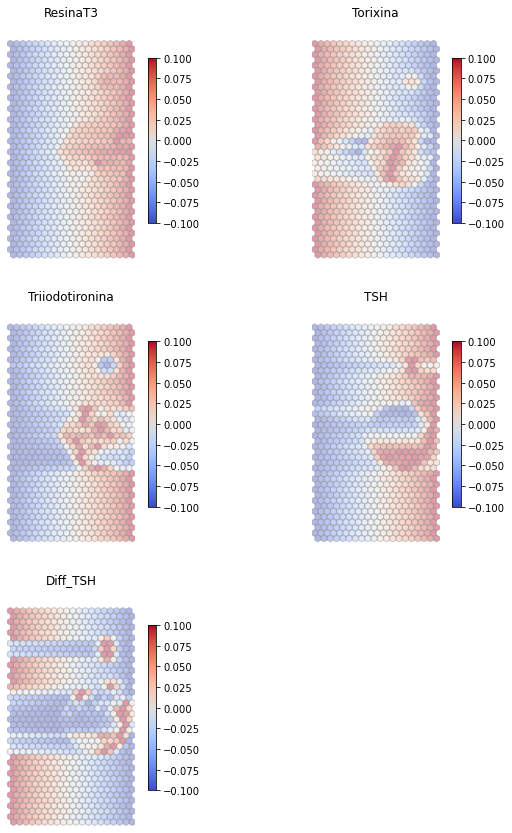

In [10]:
som.plot_map(4, 2,feature_names = fname, size=(10,20), normalize_weights = True, um = False)

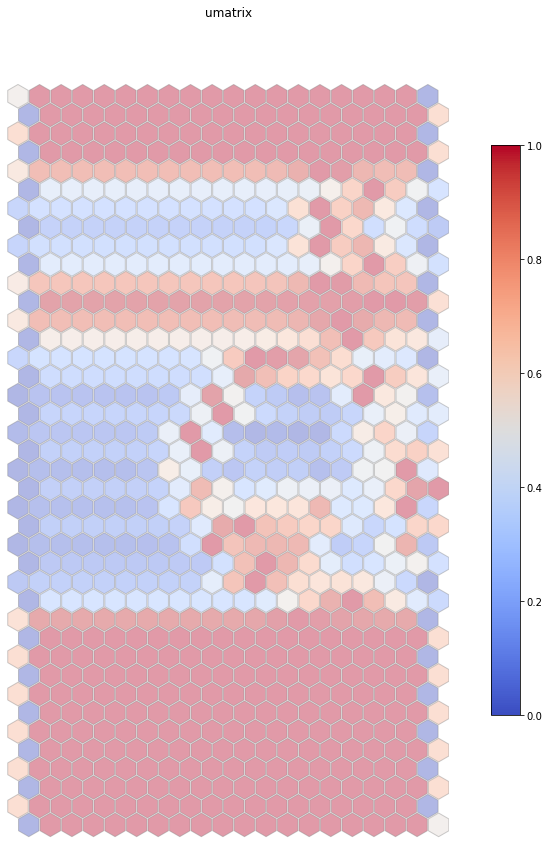

In [11]:
som.plot_umatrix()